In [1]:
#tweet cleaning
#https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis
#https://towardsdatascience.com/basic-data-cleaning-engineering-session-twitter-sentiment-data-95e5bd2869ec

#Topic Modeilling
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

#Cleaning
#Puncuation
#lower case
#stopwords
#abbreviations

# Importing modules
import pandas as pd
import os

# Load the regular expression library
import re

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk as nltk
nltk.download('stopwords')
nltk.download('wordnet')
import gensim
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from nltk.corpus import stopwords
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import pyLDAvis.gensim
import pickle 
import pyLDAvis
#import spacy
#from scispacy.abbreviation import AbbreviationDetector


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\megha\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [2]:
# Import the wordcloud library
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

C:\Users\megha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\megha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
diabetes2018 = pd.read_csv('all_diabetes2018.csv')

In [5]:
# Print head
diabetes2018.head(10)

Post ID          Author  \
0   7ng7rl  penguinsarefun   
1   7nlbda         MrCanoe   
2   7nnmor        Heylola2   
3  dwcllds       [deleted]   
4  dzokqh6        Heylola2   
5   7nnogn       jdong4321   
6   7npao8     douglas4321   
7   7nr0q2       BearFan34   
8   7ntfa9         SeanP93   
9   7nuxr5        Mike3400   

                                                                                                  Text  \
0  Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1  Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2  I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3  Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4  I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
5  My mom has diabetes and I check a lot of the symptoms of type 2, and have for a few months now b...   
6  I am type 2 not on insulin, my doctor has told me to take it before bed. I have heard people say...   
7                                                                                                  NaN   
8  Hey y’all,\n\nI’m 24-years-old, a couple pounds shy of 140 pounds, and if a stranger saw me they...   
9                                                                                                  NaN   

   Score      Publish Date  \
0      5   2018-01-01 9:16   
1      2   2018-01-02 0:58   
2     12   2018-01-02 8:55   
3      1  2018-03-26 22:23   
4      1  2018-05-27 16:56   
5      1   2018-01-02 9:02   
6      1  2018-01-02 12:51   
7     49  2018-01-02 17:04   
8      7   2018-01-03 0:43   
9     18   2018-01-03 6:23   

                                                                       Permalink  \
0                                         /r/diabetes/comments/7ng7rl/t2_newbie/   
1   /r/diabetes/comments/7nlbda/looking_into_keto_diet_how_serious_are_risks_of/   
2                       /r/diabetes/comments/7nnmor/great_start_to_the_new_year/   
3               /r/diabetes/comments/7nnmor/great_start_to_the_new_year/dwcllds/   
4               /r/diabetes/comments/7nnmor/great_start_to_the_new_year/dzokqh6/   
5           /r/diabetes/comments/7nnogn/i_think_i_have_diabetes_but_im_overseas/   
6   /r/diabetes/comments/7npao8/when_is_the_best_time_to_take_my_10mg_jardiance/   
7  /r/diabetes/comments/7nr0q2/researchers_just_accidentally_found_an_effective/   
8  /r/diabetes/comments/7ntfa9/new_young_type_ii_here_looking_for_help_guidance/   
9                                         /r/diabetes/comments/7nuxr5/seen_this/   

    Flair  Total No. of Comments  \
0  Type 2                    2.0   
1  Type 2                    6.0   
2  Type 2                    7.0   
3     NaN                    NaN   
4     NaN                    NaN   
5  Type 2                    6.0   
6  Type 2                    2.0   
7  Type 2                    5.0   
8  Type 2                   17.0   
9  Type 2                    2.0   

                                                                                                 Title  \
0                                                                                            T2 Newbie   
1                                       Looking into Keto diet, how serious are risks of hypoglycemia?   
2                                                                        Great start to the new year!!   
3                                                                                                  NaN   
4                                                                                                  NaN   
5           I think I have diabetes but I'm overseas travelling for another 45 days, how urgent is it?   
6                                                when is the best time to take my 10mg jardiance Pill?   
7  R

In [6]:
list(diabetes2018.columns)

['Post ID',
 'Author',
 'Text',
 'Score',
 'Publish Date',
 'Permalink',
 'Flair',
 'Total No. of Comments',
 'Title',
 'Url']

In [7]:
#drop unnecessary columns
diabetes2018 = diabetes2018.drop(columns = ['Score', 'Permalink', 'Flair', 'Total No. of Comments', 'Title', 'Url'])
diabetes2018

Post ID            Author  \
0       7ng7rl    penguinsarefun   
1       7nlbda           MrCanoe   
2       7nnmor          Heylola2   
3      dwcllds         [deleted]   
4      dzokqh6          Heylola2   
...        ...               ...   
12514  ecv4dtv  AccidentalDragon   
12515  ecve2zu           gnilmit   
12516  ecwd91h         jacobi123   
12517  ecwiejq          FlowMang   
12518  ecxmy0m            alan_s   

                                                                                                      Text  \
0      Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1      Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2      I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3      Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4      I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
...                                                                                                    ...   
12514  In 6 mos, my A1c went from 10.5-ish to 6.7, my cholesterol down 30 pts, triglycerides down 90 pt...   
12515  What everyone else said. I don't even do full keto - I keep my carbs under 50, instead of under ...   
12516                          A perfect example of not letting the perfect become the enemy of the good.    
12517  Same. Mine was 9.3. Was down to 5.5 after 90 days and been 5.2 and 5.3 ever since(about a year s...   
12518  &gt;What i'd like to do is lower my Tuojeo dose and want to figure out how to do that. Can someo...   

           Publish Date  
0       2018-01-01 9:16  
1       2018-01-02 0:58  
2       2018-01-02 8:55  
3      2018-03-26 22:23  
4      2018-05-27 16:56  
...                 ...  
12514   2018-12-30 2:02  
12515   2018-12-30 5:56  
12516  2018-12-30 13:32  
12517  2018-12-30 14:31  
12518   2018-12-31 0:23  

[12519 rows x 4 columns]

In [8]:
#remove any blank texts
diabetes2018 = diabetes2018[diabetes2018['Text'].notna()]
diabetes2018.head(10)

Post ID          Author  \
0    7ng7rl  penguinsarefun   
1    7nlbda         MrCanoe   
2    7nnmor        Heylola2   
3   dwcllds       [deleted]   
4   dzokqh6        Heylola2   
5    7nnogn       jdong4321   
6    7npao8     douglas4321   
8    7ntfa9         SeanP93   
10   7ny6jm      ImaniImani   
11   7o0j4z       floyd2168   

                                                                                                   Text  \
0   Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1   Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2   I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3   Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4   I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
5   My mom has diabetes and I check a lot of the symptoms of type 2, and have for a few months now b...   
6   I am type 2 not on insulin, my doctor has told me to take it before bed. I have heard people say...   
8   Hey y’all,\n\nI’m 24-years-old, a couple pounds shy of 140 pounds, and if a stranger saw me they...   
10  I made a post [here](https://www.reddit.com/r/diabetes/comments/7jfqbt/types_2_when_metformin_an...   
11  I'm a recently diagnosed Type 2 Diabetic (Nov 2017). My prescription coverage dropped Jardiance ...   

        Publish Date  
0    2018-01-01 9:16  
1    2018-01-02 0:58  
2    2018-01-02 8:55  
3   2018-03-26 22:23  
4   2018-05-27 16:56  
5    2018-01-02 9:02  
6   2018-01-02 12:51  
8    2018-01-03 0:43  
10  2018-01-03 14:11  
11  2018-01-03 20:26

In [9]:
#remove any duplicate posts
diabetes2018 = diabetes2018.drop_duplicates(subset=['Text'])

In [10]:
#remove url from text
diabetes2018['Text'] = diabetes2018['Text'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])
diabetes2018['Text'] = diabetes2018['Text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
diabetes2018

Post ID            Author  \
0       7ng7rl    penguinsarefun   
1       7nlbda           MrCanoe   
2       7nnmor          Heylola2   
3      dwcllds         [deleted]   
4      dzokqh6          Heylola2   
...        ...               ...   
12514  ecv4dtv  AccidentalDragon   
12515  ecve2zu           gnilmit   
12516  ecwd91h         jacobi123   
12517  ecwiejq          FlowMang   
12518  ecxmy0m            alan_s   

                                                                                                      Text  \
0      Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1      Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2      I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3      Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4      I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
...                                                                                                    ...   
12514  In 6 mos, my A1c went from 10.5-ish to 6.7, my cholesterol down 30 pts, triglycerides down 90 pt...   
12515  What everyone else said. I don't even do full keto - I keep my carbs under 50, instead of under ...   
12516                          A perfect example of not letting the perfect become the enemy of the good.    
12517  Same. Mine was 9.3. Was down to 5.5 after 90 days and been 5.2 and 5.3 ever since(about a year s...   
12518  &gt;What i'd like to do is lower my Tuojeo dose and want to figure out how to do that. Can someo...   

           Publish Date  
0       2018-01-01 9:16  
1       2018-01-02 0:58  
2       2018-01-02 8:55  
3      2018-03-26 22:23  
4      2018-05-27 16:56  
...                 ...  
12514   2018-12-30 2:02  
12515   2018-12-30 5:56  
12516  2018-12-30 13:32  
12517  2018-12-30 14:31  
12518   2018-12-31 0:23  

[11892 rows x 4 columns]

In [11]:
#move date column
diabetes2018 = diabetes2018[['Post ID', 'Publish Date', 'Author','Text']]
diabetes2018

Post ID      Publish Date            Author  \
0       7ng7rl   2018-01-01 9:16    penguinsarefun   
1       7nlbda   2018-01-02 0:58           MrCanoe   
2       7nnmor   2018-01-02 8:55          Heylola2   
3      dwcllds  2018-03-26 22:23         [deleted]   
4      dzokqh6  2018-05-27 16:56          Heylola2   
...        ...               ...               ...   
12514  ecv4dtv   2018-12-30 2:02  AccidentalDragon   
12515  ecve2zu   2018-12-30 5:56           gnilmit   
12516  ecwd91h  2018-12-30 13:32         jacobi123   
12517  ecwiejq  2018-12-30 14:31          FlowMang   
12518  ecxmy0m   2018-12-31 0:23            alan_s   

                                                                                                      Text  
0      Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...  
1      Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...  
2      I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...  
3      Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...  
4      I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...  
...                                                                                                    ...  
12514  In 6 mos, my A1c went from 10.5-ish to 6.7, my cholesterol down 30 pts, triglycerides down 90 pt...  
12515  What everyone else said. I don't even do full keto - I keep my carbs under 50, instead of under ...  
12516                          A perfect example of not letting the perfect become the enemy of the good.   
12517  Same. Mine was 9.3. Was down to 5.5 after 90 days and been 5.2 and 5.3 ever since(about a year s...  
12518  &gt;What i'd like to do is lower my Tuojeo dose and want to figure out how to do that. Can someo...  

[11892 rows x 4 columns]

In [12]:
#view gensim stopwords
all_stopwords = gensim.parsing.preprocessing.STOPWORDS
print(all_stopwords)

frozenset({'thereupon', 'an', 'your', 'more', 'various', 'amongst', 'might', 'our', 'via', 'and', 'within', 'namely', 'doesn', 'done', 'no', 'fifteen', 'hers', 'bottom', 'we', 'someone', 'except', 'why', 'again', 'since', 'please', 'quite', 'i', 'otherwise', 'he', 'nine', 'up', 'kg', 'some', 'thence', 'somewhere', 'in', 'de', 'but', 'forty', 'used', 'back', 'too', 'with', 'five', 'to', 'make', 'whatever', 'many', 'such', 'where', 'third', 'further', 'give', 'here', 'must', 'therein', 'serious', 'as', 'myself', 'without', 'one', 'himself', 'least', 'move', 'around', 'nothing', 'than', 'this', 'indeed', 'eleven', 'that', 'either', 'mill', 'across', 'becomes', 'on', 'moreover', 'etc', 'been', 'she', 'co', 'twelve', 'will', 'made', 'twenty', 'which', 'nevertheless', 'became', 'at', 'among', 'although', 'few', 'thin', 'out', 'whom', 'wherever', 'latter', 'become', 'something', 'onto', 'whether', 'anyway', 'each', 'during', 'ours', 'off', 'herein', 'part', 'several', 'did', 'ten', 'fifty', '

In [13]:
#stopword libraries https://stackabuse.com/removing-stop-words-from-strings-in-python/
#gensim stopwords
from gensim.parsing.preprocessing import remove_stopwords


#text = "Nick likes to play football, however he is not too fond of tennis."
#filtered_sentence = remove_stopwords(text)

#print(filtered_sentence)
#def remove_stopwords(text):
    #text = [word for word in text if word not in stopword]
    #print(text)
    #return text
    
#diabetes2018['text_nonstop'] = diabetes2018['text_tokenized'].apply(lambda x: remove_stopwords(x))
#diabetes2018.head(10)

diabetes2018['text_gens_nonstop'] = diabetes2018['Text'].apply(lambda x: remove_stopwords(x))
diabetes2018

<ipython-input-13-138d4719541e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['text_gens_nonstop'] = diabetes2018['Text'].apply(lambda x: remove_stopwords(x))


Post ID      Publish Date            Author  \
0       7ng7rl   2018-01-01 9:16    penguinsarefun   
1       7nlbda   2018-01-02 0:58           MrCanoe   
2       7nnmor   2018-01-02 8:55          Heylola2   
3      dwcllds  2018-03-26 22:23         [deleted]   
4      dzokqh6  2018-05-27 16:56          Heylola2   
...        ...               ...               ...   
12514  ecv4dtv   2018-12-30 2:02  AccidentalDragon   
12515  ecve2zu   2018-12-30 5:56           gnilmit   
12516  ecwd91h  2018-12-30 13:32         jacobi123   
12517  ecwiejq  2018-12-30 14:31          FlowMang   
12518  ecxmy0m   2018-12-31 0:23            alan_s   

                                                                                                      Text  \
0      Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1      Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2      I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3      Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4      I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
...                                                                                                    ...   
12514  In 6 mos, my A1c went from 10.5-ish to 6.7, my cholesterol down 30 pts, triglycerides down 90 pt...   
12515  What everyone else said. I don't even do full keto - I keep my carbs under 50, instead of under ...   
12516                          A perfect example of not letting the perfect become the enemy of the good.    
12517  Same. Mine was 9.3. Was down to 5.5 after 90 days and been 5.2 and 5.3 ever since(about a year s...   
12518  &gt;What i'd like to do is lower my Tuojeo dose and want to figure out how to do that. Can someo...   

                                                                                         text_gens_nonstop  
0      Hey all! Happy New year's! Just wanted hi. I diagnosed type 2 DM Thursday. I've crazy fatigued t...  
1      Hello I'm 6'1, 260lbs male Type 2 diabetes. I've looking Keto way lose weight hopefully lower me...  
2      I a1c checked today it's 5.1!!! Three/four months ago 7.9! I'm taken metformin (and I'll tested ...  
3      Hey old post congrats! This motivating. Side note, desk cycle for? I got sure reasonable time use .  
4      I stick fitbit ankle count 'steps' I end entire time I'm desk days, 8+ hours (not usually fast) ...  
...                                                                                                    ...  
12514  In 6 mos, A1c went 10.5-ish 6.7, cholesterol 30 pts, triglycerides 90 pts, bad cholesterol 10. :...  
12515  What said. I don't keto - I carbs 50, instead 20 - A1C went 11.8 6.0 6 months. I don't willpower...  
12516                                                        A perfect example letting perfect enemy good.  
12517  Same. Mine 9.3. Was 5.5 90 days 5.2 5.3 since(about year doctor discontinued metformin). My bloo...  
12518  &gt;What i'd like lower Tuojeo dose want figure that. Can recommend good diet follow sugars chec...  

[11892 rows x 5 columns]

In [14]:
#Remove punctuations & upper case
#Remove stopwords
#Lammetization/stemming - Tranforming any form of a word to its root word
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
#remove puncutation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

diabetes2018['text_processed'] = diabetes2018['text_gens_nonstop'].apply(lambda x: remove_punct(x))
diabetes2018.head(10)

<ipython-input-15-0ffbc2dcd318>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['text_processed'] = diabetes2018['text_gens_nonstop'].apply(lambda x: remove_punct(x))


Post ID      Publish Date          Author  \
0    7ng7rl   2018-01-01 9:16  penguinsarefun   
1    7nlbda   2018-01-02 0:58         MrCanoe   
2    7nnmor   2018-01-02 8:55        Heylola2   
3   dwcllds  2018-03-26 22:23       [deleted]   
4   dzokqh6  2018-05-27 16:56        Heylola2   
5    7nnogn   2018-01-02 9:02       jdong4321   
6    7npao8  2018-01-02 12:51     douglas4321   
8    7ntfa9   2018-01-03 0:43         SeanP93   
10   7ny6jm  2018-01-03 14:11      ImaniImani   
11   7o0j4z  2018-01-03 20:26       floyd2168   

                                                                                                   Text  \
0   Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1   Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2   I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3   Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4   I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
5   My mom has diabetes and I check a lot of the symptoms of type 2, and have for a few months now b...   
6   I am type 2 not on insulin, my doctor has told me to take it before bed. I have heard people say...   
8   Hey y’all,\n\nI’m 24-years-old, a couple pounds shy of 140 pounds, and if a stranger saw me they...   
10                                                                                I made a post [here](   
11  I'm a recently diagnosed Type 2 Diabetic (Nov 2017). My prescription coverage dropped Jardiance ...   

                                                                                      text_gens_nonstop  \
0   Hey all! Happy New year's! Just wanted hi. I diagnosed type 2 DM Thursday. I've crazy fatigued t...   
1   Hello I'm 6'1, 260lbs male Type 2 diabetes. I've looking Keto way lose weight hopefully lower me...   
2   I a1c checked today it's 5.1!!! Three/four months ago 7.9! I'm taken metformin (and I'll tested ...   
3   Hey old post congrats! This motivating. Side note, desk cycle for? I got sure reasonable time use .   
4   I stick fitbit ankle count 'steps' I end entire time I'm desk days, 8+ hours (not usually fast) ...   
5   My mom diabetes I check lot symptoms type 2, months I lazy/in denial (I know, I'm actual idiot) ...   
6   I type 2 insulin, doctor told bed. I heard people best directly largest meal day. Wondering cons...   
8   Hey y’all, I’m 24-years-old, couple pounds shy 140 pounds, stranger saw they’d assume I’m health...   
10                                                                                       I post [here](   
11  I'm recently diagnosed Type 2 Diabetic (Nov 2017). My prescription coverage dropped Jardiance fo...   

                                                                                         text_processed  
0   Hey all Happy New years Just wanted hi I diagnosed type  DM Thursday Ive crazy fatigued thirsty ...  
1   Hello Im  lbs male Type  diabetes Ive looking Keto way lose weight hopefully lower medication im...  
2   I ac checked today its  Threefour months ago  Im taken metformin and Ill tested months see Im ex...  
3        Hey old post congrats This motivating Side note desk cycle for I got sure reasonable time use   
4   I stick fitbit ankle count steps I end entire time Im desk days  hours not usually fast I k step...  
5   My mom diabetes I check lot symptoms type  months I lazyin denial I know Im actual idiot go Just...  
6   I type  insulin doctor told bed I heard people best directly largest meal day Wondering consensu...  
8   Hey y’all I’m yearsold couple pounds shy  pounds stranger saw they’d assume I’m healthy young gu...  
10                                                                                          I post here  
11  Im recently diagnosed Type  Diabetic Nov  My

In [16]:
#switch to lower case
diabetes2018['text_processed'] = \
diabetes2018['text_processed'].map(lambda x: x.lower())
diabetes2018

<ipython-input-16-432712019d27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['text_processed'] = \


Post ID      Publish Date            Author  \
0       7ng7rl   2018-01-01 9:16    penguinsarefun   
1       7nlbda   2018-01-02 0:58           MrCanoe   
2       7nnmor   2018-01-02 8:55          Heylola2   
3      dwcllds  2018-03-26 22:23         [deleted]   
4      dzokqh6  2018-05-27 16:56          Heylola2   
...        ...               ...               ...   
12514  ecv4dtv   2018-12-30 2:02  AccidentalDragon   
12515  ecve2zu   2018-12-30 5:56           gnilmit   
12516  ecwd91h  2018-12-30 13:32         jacobi123   
12517  ecwiejq  2018-12-30 14:31          FlowMang   
12518  ecxmy0m   2018-12-31 0:23            alan_s   

                                                                                                      Text  \
0      Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1      Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2      I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3      Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4      I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
...                                                                                                    ...   
12514  In 6 mos, my A1c went from 10.5-ish to 6.7, my cholesterol down 30 pts, triglycerides down 90 pt...   
12515  What everyone else said. I don't even do full keto - I keep my carbs under 50, instead of under ...   
12516                          A perfect example of not letting the perfect become the enemy of the good.    
12517  Same. Mine was 9.3. Was down to 5.5 after 90 days and been 5.2 and 5.3 ever since(about a year s...   
12518  &gt;What i'd like to do is lower my Tuojeo dose and want to figure out how to do that. Can someo...   

                                                                                         text_gens_nonstop  \
0      Hey all! Happy New year's! Just wanted hi. I diagnosed type 2 DM Thursday. I've crazy fatigued t...   
1      Hello I'm 6'1, 260lbs male Type 2 diabetes. I've looking Keto way lose weight hopefully lower me...   
2      I a1c checked today it's 5.1!!! Three/four months ago 7.9! I'm taken metformin (and I'll tested ...   
3      Hey old post congrats! This motivating. Side note, desk cycle for? I got sure reasonable time use .   
4      I stick fitbit ankle count 'steps' I end entire time I'm desk days, 8+ hours (not usually fast) ...   
...                                                                                                    ...   
12514  In 6 mos, A1c went 10.5-ish 6.7, cholesterol 30 pts, triglycerides 90 pts, bad cholesterol 10. :...   
12515  What said. I don't keto - I carbs 50, instead 20 - A1C went 11.8 6.0 6 months. I don't willpower...   
12516                                                        A perfect example letting perfect enemy good.   
12517  Same. Mine 9.3. Was 5.5 90 days 5.2 5.3 since(about year doctor discontinued metformin). My bloo...   
12518  &gt;What i'd like lower Tuojeo dose want figure that. Can recommend good diet follow sugars chec...   

                                                                                            text_processed  
0      hey all happy new years just wanted hi i diagnosed type  dm thursday ive crazy fatigued thirsty ...  
1      hello im  lbs male type  diabetes ive looking keto way lose weight hopefully lower medication im...  
2      i ac checked today its  threefour months ago  im taken metformin and ill tested months see im ex...  
3           hey old post congrats this motivating side note desk cycle for i got sure reasonable time use   
4      i stick fitbit ankle count steps i end entire time im desk days  hours not usually fast i k step...  
...                                                           

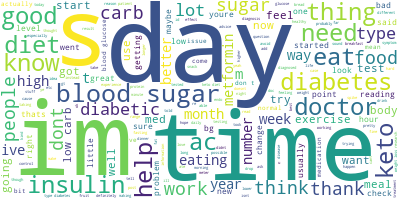

In [17]:
# Join the different processed titles together.
long_string = ','.join(list(diabetes2018['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [18]:
#tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

diabetes2018['text_tokenized'] = diabetes2018['text_processed'].apply(lambda x: tokenization(x.lower()))
diabetes2018.head(10)

<ipython-input-18-b2a5f6600d7e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['text_tokenized'] = diabetes2018['text_processed'].apply(lambda x: tokenization(x.lower()))


Post ID      Publish Date          Author  \
0    7ng7rl   2018-01-01 9:16  penguinsarefun   
1    7nlbda   2018-01-02 0:58         MrCanoe   
2    7nnmor   2018-01-02 8:55        Heylola2   
3   dwcllds  2018-03-26 22:23       [deleted]   
4   dzokqh6  2018-05-27 16:56        Heylola2   
5    7nnogn   2018-01-02 9:02       jdong4321   
6    7npao8  2018-01-02 12:51     douglas4321   
8    7ntfa9   2018-01-03 0:43         SeanP93   
10   7ny6jm  2018-01-03 14:11      ImaniImani   
11   7o0j4z  2018-01-03 20:26       floyd2168   

                                                                                                   Text  \
0   Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1   Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2   I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3   Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4   I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
5   My mom has diabetes and I check a lot of the symptoms of type 2, and have for a few months now b...   
6   I am type 2 not on insulin, my doctor has told me to take it before bed. I have heard people say...   
8   Hey y’all,\n\nI’m 24-years-old, a couple pounds shy of 140 pounds, and if a stranger saw me they...   
10                                                                                I made a post [here](   
11  I'm a recently diagnosed Type 2 Diabetic (Nov 2017). My prescription coverage dropped Jardiance ...   

                                                                                      text_gens_nonstop  \
0   Hey all! Happy New year's! Just wanted hi. I diagnosed type 2 DM Thursday. I've crazy fatigued t...   
1   Hello I'm 6'1, 260lbs male Type 2 diabetes. I've looking Keto way lose weight hopefully lower me...   
2   I a1c checked today it's 5.1!!! Three/four months ago 7.9! I'm taken metformin (and I'll tested ...   
3   Hey old post congrats! This motivating. Side note, desk cycle for? I got sure reasonable time use .   
4   I stick fitbit ankle count 'steps' I end entire time I'm desk days, 8+ hours (not usually fast) ...   
5   My mom diabetes I check lot symptoms type 2, months I lazy/in denial (I know, I'm actual idiot) ...   
6   I type 2 insulin, doctor told bed. I heard people best directly largest meal day. Wondering cons...   
8   Hey y’all, I’m 24-years-old, couple pounds shy 140 pounds, stranger saw they’d assume I’m health...   
10                                                                                       I post [here](   
11  I'm recently diagnosed Type 2 Diabetic (Nov 2017). My prescription coverage dropped Jardiance fo...   

                                                                                         text_processed  \
0   hey all happy new years just wanted hi i diagnosed type  dm thursday ive crazy fatigued thirsty ...   
1   hello im  lbs male type  diabetes ive looking keto way lose weight hopefully lower medication im...   
2   i ac checked today its  threefour months ago  im taken metformin and ill tested months see im ex...   
3        hey old post congrats this motivating side note desk cycle for i got sure reasonable time use    
4   i stick fitbit ankle count steps i end entire time im desk days  hours not usually fast i k step...   
5   my mom diabetes i check lot symptoms type  months i lazyin denial i know im actual idiot go just...   
6   i type  insulin doctor told bed i heard people best directly largest meal day wondering consensu...   
8   hey y’all i’m yearsold couple pounds shy  pounds stranger saw they’d assume i’m healthy young gu...   
10                                                                                          i post here   
11  im recently diagnosed type  diabet

In [19]:
#remove nlk stopwords
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['get', "didnt", 'would', 'a', 'hey', 'hello', 'hi', "ive", "im", 'like', 'also',"don't", "I've", "I'm", "I'll", 'id', 'dont', 'wont', 'isnt', 'lol', 'youre', 'youll', 'doesnt'])
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
#remove nlk stopwords
def remove_nlk_stopwords(text):
    text = [word for word in text if word not in stopword]
    print(text)
    return text
    
diabetes2018['text_nlk_nonstop'] = diabetes2018['text_tokenized'].apply(lambda x: remove_nlk_stopwords(x))
diabetes2018.head(10)

['happy', 'new', 'years', 'wanted', 'diagnosed', 'type', 'dm', 'thursday', 'crazy', 'fatigued', 'thirsty', 'x', 'months', 'fasting', 'glucose', 'morning', 'started', 'metformin', 'trulicity', 'eating', 'feel', 'better', 'generally', 'hungry', 'tired', 'fasting', 'glucose', 'morning', 'since', 'looking', 'forward', 'journey']
['lbs', 'male', 'type', 'diabetes', 'looking', 'keto', 'way', 'lose', 'weight', 'hopefully', 'lower', 'medication', 'currently', 'metformin', 'gliclazide', 'jardiance', 'day', 'pills', 'total', 'risky', 'keto', 'diet', 'medication', 'jardiancealso', 'called', 'empagliflozin', 'new', 'ac', 'risen', 'mid', 'one', 'reasons', 'got', 'new', 'doctor', 'late', 'old', 'doctor', 'metformins', 'gliclazides', 'day', 'getting', 'ac', 'new', 'doctor', 'told', 'acs', 'bad', 'diabetic', 'gliclazide', 'great', 'heart', 'reduced', 'problem', 'wasnt', 'eating', 'great', 'bad', 'habitstoo', 'snacking', 'meal', 'bed', 'work', 'hour', 'days', 'home', 'till', 'ac', 'went', 'till', 'hit'

['keto', 'carbs', 'raises', 'blood', 'sugar', 'carbs', 'means', 'lower', 'blood', 'sugars', 'strongly', 'suggest', 'book', 'diabetes', 'solution', 'dr', 'bernstein', 'quack', 'book', 'cutting', 'carbs', 'type', 'diabetes', 'childhood', 'complications', 'working', 'time', 'inspiration', 'us']
['see', 'day', 'water', 'fast', 'nice', 'jump', 'start', 'able', 'mg', 'dl', 'stay', 'rate', 'large', 'help', 'stayed', 'thanks', 'eating', 'protiens', 'fats', 'generally', 'avoiding', 'carbsunhealthy', 'foods']
['main', 'thing', 'treat', 'type', 'diabetes', 'medication', 'eat', 'carbs', 'carbohydrates', 'look', 'nutrition', 'label', 'foods', 'eat', 'eat', 'pay', 'attention', 'carbs', 'long', 'figure', 'whats', 'high', 'carbs', 'whats', 'carbs', 'blood', 'sugar', 'diabetics', 'necessary', 'cut', 'completely', 'ones', 'diet', 'less', 'fan', 'taking', 'slow', 'burn', 'early', 'example', 'try', 'piece', 'breadtoast', 'breakfast', 'instead', 'two', 'cutfold', 'half', 'want', 'sandwich', 'stuff', 'matte

['curious', 'point', 'rule', 'apply', 'regardless', 'start', 'fasting', 'say', 'breakfast', 'bad']
['qualified', 'answer', 'suspect', 'yes']
['gt', 'ac', 'better', 'feel', 'anxiety', 'crashing', 'lows', 'stubborn', 'highs', 'eat', 'bacon', 'lot', 'much', 'better', 'life', 'life', 'goals', 'right', 'feel', 'better', 'sugar', 'stable', 'stable', 'months', 'spikes', 'feel', 'absolute', 'shit', 'definitely', 'feel', 'difference', 'disease', 'different', 'beast', 'obviously', 'dr', 'bernstein', 'hero']
['thanks', 'reply', 'helpful']
['thank', 'suspected', 'though', 'hoped', 'wrong']
['thanks', 'reply']
['gt', 'checked', 'hour', 'later', 'sugar', 'repeated', 'test', 'sure', 'waited', 'hour', 'mark', 'usually', 'check', 'fairly', 'typical', 'timing', 'new', 'typical', 'postbreakfast', 'result', 'breakfast', 'carbs', 'trust', 'meter', 'reduce', 'carbs', 'breakfast', 'finished', 'breakfast', 'small', 'pork', 'sausage', 'oneegg', 'omelette', 'hour', 'fasting', 'gtmy', 'question', 'temporary', 'h

['actually', 'observed', 'meter', 'drink', 'ton', 'water', 'especially', 'electrolytes', 'glucose', 'temporarily', 'drop', 'dilution', 'kidneys', 'start', 'working', 'actually', 'low', 'theres', 'glucose', 'around', 'effect', 'unmistakable']
['initially', 'basil', 'dosage', 'right', 'massive', 'peaks', 'brutal', 'crashes', 'libre', 'allowed', 'trends', 'instead', 'isolated', 'moments', 'time', 'saw', 'constant', 'climbcrash', 'cycle', 'able', 'lower', 'basil', 'u', 'increase', 'bolus', 'deliver', 'essentially', 'daily', 'insulin', 'way', 'gives', 'flat', 'trend', 'line', 'understand', 'specific', 'foods', 'pizza', 'example', 'eat', 'dose', 'low', 'skyrocket', 'correction', 'helped', 'visualize', 'carb', 'release', 'times', 'instead', 'waking', 'thinking', 'wtf']
['started', 'sensor', 'reads', 'bit', 'lower', 'mmol', 'mgdl', 'freestyle', 'lite', 'compare', 'better', 'sensors', 'mmoll', 'mgdl', 'low', 'times', 'batch']
['crosspost', 'rbreastfeeding', 'type', 'diabetic', 'weeks', 'second'

['insulin', 'assist', 'insist', 'cue', 'bouncy', 'ukelelewhistling', 'duet', 'montage', 'people', 'walking', 'grass', 'barefoot', 'exercising', 'eating', 'lettuce', 'wrap', 'seizures', 'etc', 'type', 'diabetes', 'insist', 'cue', 'preferably', 'brown', 'actors', 'holding', 'glucose', 'meters', 'reading', 'ranging', 'insist', 'insist', 'insist', 'cut', 'original', 'actor', 'insist', 'normal', 'glucose', 'levels']
['']
['suffering', 'type', 'diabetes', 'years', 'slowly', 'hbac', 'getting', 'higher', 'reading', 'glucose', 'machine', 'doctor', 'started', 'new', 'medication', 'invokana', 'anybody', 'experience', 'medication', 'started', 'mg', 'starting', 'dose', 'told', 'weeks', 'needs', 'increasing', 'mg', 'metformin', 'worried', 'increased', 'urinary', 'output', 'caused', 'invokana', 'worry', 'want', 'caught', 'short', 'away', 'toilet', 'thanks', 'advance', 'reply']
['blood', 'sugar', 'drink', 'pee', 'lot', 'actually', 'betterbut', 'think', 'irresponsible', 'doctor', 'randomly', 'pick', 'n

['happen', 'defective', 'sensor', 'kept', 'saying', 'restart', 'called', 'customer', 'service', 'amp', 'sent', 'replacement']
['successfully', 'reversed', 'diabetes', 'ketogenic', 'diet', 'fasting', 'recently', 'fall', 'injured', 'right', 'scapula', 'incredibly', 'painful', 'hed', 'stop', 'exercise', 'want', 'stop', 'pain', 'afraid', 'narcotics', 'doctor', 'shoulder', 'clinic', 'ia', 'going', 'inject', 'cortisone', 'injured', 'area', 'skyrocket', 'blood', 'sugar', 'doctor', 'concerned']
['steroids', 'oral', 'intramuscular', 'intraarticular', 'etc', 'generally', 'increase', 'insulin', 'resistance', 'cause', 'postmeal', 'blood', 'sugars', 'run', 'high', 'however', 'able', 'avoid', 'ketogenic', 'diet', 'resuming', 'exercise', 'pain', 'relief', 'hard', 'know', 'lucky', 'ones', 'increase', 'blood', 'sugars']
['eye', 'drops', 'little', 'cortisone', 'ut', 'siked', 'times', 'wasnt', 'eating', 'eating', 'carbs']
['cortisone', 'shot', 'hand', 'elevated', 'bg', 'day', 'pretty', 'manageable', 'day

['think', 'use', 'help', 'taking', 'care', 'struggle', 'motivation', 'maintain', 'diet', 'amp', 'exercise', 'stressfree', 'forget', 'medications', 'supplements', 'ordered', 'sitting', 'shelf', 'touching', 'cuemed', 'developing', 'technology', 'aims', 'improve', 'health', 'outcomes', 'helping', 'people', 'stick', 'medication', 'regimen', 'lifestyle', 'changes', 'recommended', 'conducting', 'research', 'study', 'want', 'sure', 'product', 'help', 'research', 'study', 'place', 'online', 'approximately', 'hour', 'selected', 'participants', 'receive', 'amazon', 'gift', 'card', 'take', 'survey', 'today', 'qualify', '']
['took', 'gift', 'card', 'probably', 'spammed', 'tread', 'lightly', 'guys']
['thank', 'taking', 'survey', 'screeningqualification', 'survey', 'mentioned', 'based', 'survey', 'responses', 'selecting', 'candidates', 'research', 'study', 'approximately', 'hour', 'selected', 'participants', 'receive', 'amazon', 'gift', 'card', 'research', 'study', 'completed', 'thanks']
['erm', 'st

['pork', 'rinddddds']
['sugary', 'drinks', 'sort', 'diabetes', 'sorry', 'body', 'overload', 'sugar', 'happy', 'cut', 'panicking', 'take', 'deep', 'breathes', 'try', 'relax', 'use', 'sugarfree', 'drinks', 'help', 'diet', 'order', 'eventually', 'diet', 'remove', 'sugar', 'diet', 'probably', 'start', 'sugarfree', 'drinks', 'sweet', 'start', 'diluting']
['sounds', 'pretty', 'tragic', 'root', 'beer', 'ginger', 'ale', 'chocolate', 'milk', 'shake', 'lingonberry', 'cola', 'stevia', 'aisle', 'fizzy', 'drinks', 'pretty', 'devastated', 'thanks', 'reply']
['learn', 'drink', 'lot', 'seltzer', 'water', 'want', 'fizzy', 'feeling']
['daughter', 'bought', 'sodastream', 'diet', 'root', 'beer', 'mix', 'use', 'mix', 'flavored', 'carbonated', 'waters', 'lacroix', 'thing']
['tragic', 'happens', 'ignore', 'diabetics', 'dietary', 'restrictions', 'inconvenient', 'artificial', 'sweeteners', 'problem', 'free', 'fuel', 'carb', 'cravings', 'impact', 'blood', 'sugar', 'folks', 'realize', 'life', 'finding', 'dietary

['lot', 'carbs']
['blood', 'sugar', 'normal', 'range', 'time', 'check', 'guess', 'many']
['works']
['since', 'folks', 'touched', 'depth', 'low', 'carbketo', 'add', 'little', 'perspective', 'exercise', 'exercise', 'good', 'helps', 'burn', 'energy', 'liver', 'producing', 'need', 'crazy', 'cardio', 'small', 'step', 'common', 'recommendation', 'minute', 'walk', 'days', 'week']
['guys', 'fabian', 'germany', 'diagnosed', 'type', 'complaints', 'driving', 'currently', 'working', 'new', 'idea', 'cooperation', 'bmw', 'working', 'blood', 'sugar', 'indicator', 'car', 'uses', 'values', 'blood', 'sugar', 'sensors', 'feel', 'diabetes', 'complaints', 'drive', 'please', 'minutes', 'offer', 'feedback', 'answers', 'kept', 'entirely', 'confidental', 'click', 'start', 'survey']
['privacy', 'pov', 'bother', 'private', 'company', 'data', 'liability', 'view', 'blood', 'sugar', 'numbers', 'case', 'crash', 'contributing', 'factor', 'way', 'contributed', 'cause']
['long', 'survey', 'indeed', 'hope', 'data', 'hel

['want', 'shot', 'theres', 'tons', 'information', 'keto', 'good', 'luck']
['fat', 'adapted', 'cholesterol', 'drops', 'simple', 'body', 'overwhelmed', 'process', 'carbssugar', 'focus', 'excess', 'lipids', 'especially', 'dangerous', 'triglycerides', 'ldl', 'pattern', 'b', 'small', 'particle', 'ldl', 'bad', 'ldl', 'large', 'particle', 'ldl', 'bad', 'stuff', 'makes', 'nuts', 'people', 'bad', 'cholesterol', 'high', 'meaning', 'total', 'ldl', 'ask', 'demand', 'necessary', 'particle', 'size', 'lipid', 'test', 'patter', 'pattern', 'b', 'ldl', 'b', 'bad', 'ok', 'lets', 'ldl', 'enemy', '']
['smart', 'though', 'electrolytes', 'week', 'try', 'restrict', 'want', 'eat', 'cravings', 'sugar', 'hunger', 'pangs', 'key', 'eat', 'eat', 'keto', 'week', 'look', 'eating', 'body', 'adjusting', 'new', 'paradigm', 'ok', 'feel', 'little', 'weird', 'ok', 'hungry', 'normal', 'purging', 'bad', 'habits', 'sugarcarbs', 'puts', 'eventually', 'day', 'appetite', 'normalize', 'point', 'long', 'time', 'eating', 'notice', 

['thank', 'helpful', 'frustrated', 'doctor', 'office', 'anything', 'morning']
['yeah', 'kind', 'shotty', 'told', 'phone', 'pcp', 'awesome', 'likehere', 'books', 'diabetes', 'test', 'strips', 'lancets', 'meter', 'metformin', 'endocrinologist', 'dietician', 'class', 'questions', 'kathy', 'fyi', 'metformin', 'tends', 'people', 'diarrhea', 'take', 'food', 'pcp', 'endocrinologist', 'clear', 'ween', 'problems', 'week', 'went', 'away']
['metformin', 'xr', 'cleared', 'digestive', 'issues', 'regular', 'ill']
['deep', 'breaths', 'sounds', 'hyperaware', 'body', 'good', 'thing', 'doctor', 'play', 'internetssoyour', 'numbers', 'arent', 'charts', 'terrible', 'thats', 'good', 'diabetes', 'education', 'class', 'excellent', 'sounds', 'receptive', 'learning', 'someimes', 'people', 'newly', 'diagnosed', 'denial', 'routine', 'works', 'daunting', 'reddit', 'sub', 'gold', 'informationtry', 'search', 'feature', 'ask', 'questions', 'sometimes', 'doctors', 'endos', 'know', 'latest', 'advances', 'discussion', '

['sorry', 'happened', 'fair', 'please', 'doctor', 'sure', 'test', 'confirm', 'type', 'diabetes', 'unheard', 'late', 'onset', 'type', 'someone', 'mentioned', 'pcos', 'sure', 'root', 'problem', 'know', 'alone', 'diagnosis', 'prediabetes', 'diabetes', 'increasing', 'lot', 'reasons', 'testing', 'finding', 'younger', 'healthier', 'people', 'love', 'hear', 'ideas', 'nutritionist', 'lowcarb', 'keto', 'diets', 'controlling', 'diet', 'exercise', 'low', 'carb', 'little', 'years']
['sorry', 'boatyoung', 'healthy', 'weight', 'healthy', 'diet', 'prediabetic', 'genetic', 'family', 'members', 'diagnosed', 'healthy', 'fit']
['sustainability', 'issue', 'keto', 'better', 'place', 'relatively', 'quickly', 'bad', 'thing', 'diagnosed', 'went', 'low', 'carb', 'took', 'lbs', 'got', 'major', 'control', 'relaxed', 'bit', 'early', 'days', 'near', 'carb', 'consumption', 'level', 'prior', 'diagnosis', 'yeah', 'original', 'diet', 'plan', 'hasnt', 'sustained', 'numbers', 'good', 'according', 'meter', 'yearly', 'che

['started', 'swimming', 'times', 'week', 'walking', 'dog', 'day', 'cut', 'sugar', 'reduced', 'junk', 'food', 'completely', 'hopefully', 'ill', 'turn', 'things', 'time']
['sure', 'wish', 'best', 'good', 'work', '']
['congrats', 'thats', 'awesome']
['highs', 'eating']
['yes', 'partly', 'recovery', 'brain', 'cancerchemo', 'steroids', 'shrink', 'tumor', 'play', 'havok', 'blood', 'sugar', 'actually', 'wasnt', 'consistent', 'meds', 'trying', 'ignore', 'obviously', 'work', 'feet', 'burning', 'pain', 'bad', 'couldnt', 'sleep', 'night', 'thirsty', 'peeing', 'time', 'gone', 'started', 'keto', 'jan', 'nd', 'stay', 'carbs', 'stay', 'huge', 'change', 'basically', 'carbaterian', 'havent', 'week']
['man', 'bullshit', 'deal', 'cancer', 'diabetes', 'fuck', 'powers', 'saddling', 'massive', 'kudos', 'taking', 'control', 'know', 'trying', 'ignore', 'diagnosed', 'year', 'initial', 'scare', 'fallen', 'old', 'bad', 'habits', 'decent', 'control', 'minimal', 'effort', 'better', 'hope', 'live', 'long', 'time', 

['youve', 'got', 'things', 'need', 'think', 'total', 'calories', 'quickly', 'bg', 'spikes', 'gi', 'sweet', 'cycling', 'straight', 'away', 'need', 'worry', 'spike', 'going', 'burn', 'straight', 'caveat', 'add', 'particularly', 'fatty', 'dessert', 'cheesecake', 'instance', 'actually', 'absorb', 'glucose', 'fast', 'energy', 'need', 'ride', 'end', 'hypo', 'unless', 'training', 'lot', 'unlikely', 'putting', 'spike', 'aside', 'need', 'figure', 'total', 'calories', 'dessert', 'calories', 'burn', 'bike', 'estimate', 'burn', 'rate', 'try']
['thanks', 'explanation', 'input', 'output', 'food', 'taken', 'food', 'burnedtaken', 'body', 'order', 'remedy', 'effect', 'treat']
['essentially', 'yes', 'end', 'bg', 'calories', 'body', 'downside', 'insulin', 'degree']
['depletion', 'insulin', 'bad', 'thing']
['bad', 'aware', 'eat', 'food', 'insulin', 'available', 'cover', 'bg', 'spike', 'put', 'way', 'kept', 'repeating', 'cycle', 'eat', 'sweet', 'thing', 'exercise', 'notice', 'time', 'harder', 'started', 'e

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
diabetes2018

Post ID      Publish Date            Author  \
0       7ng7rl   2018-01-01 9:16    penguinsarefun   
1       7nlbda   2018-01-02 0:58           MrCanoe   
2       7nnmor   2018-01-02 8:55          Heylola2   
3      dwcllds  2018-03-26 22:23         [deleted]   
4      dzokqh6  2018-05-27 16:56          Heylola2   
...        ...               ...               ...   
12514  ecv4dtv   2018-12-30 2:02  AccidentalDragon   
12515  ecve2zu   2018-12-30 5:56           gnilmit   
12516  ecwd91h  2018-12-30 13:32         jacobi123   
12517  ecwiejq  2018-12-30 14:31          FlowMang   
12518  ecxmy0m   2018-12-31 0:23            alan_s   

                                                                                                      Text  \
0      Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1      Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2      I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3      Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4      I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
...                                                                                                    ...   
12514  In 6 mos, my A1c went from 10.5-ish to 6.7, my cholesterol down 30 pts, triglycerides down 90 pt...   
12515  What everyone else said. I don't even do full keto - I keep my carbs under 50, instead of under ...   
12516                          A perfect example of not letting the perfect become the enemy of the good.    
12517  Same. Mine was 9.3. Was down to 5.5 after 90 days and been 5.2 and 5.3 ever since(about a year s...   
12518  &gt;What i'd like to do is lower my Tuojeo dose and want to figure out how to do that. Can someo...   

                                                                                         text_gens_nonstop  \
0      Hey all! Happy New year's! Just wanted hi. I diagnosed type 2 DM Thursday. I've crazy fatigued t...   
1      Hello I'm 6'1, 260lbs male Type 2 diabetes. I've looking Keto way lose weight hopefully lower me...   
2      I a1c checked today it's 5.1!!! Three/four months ago 7.9! I'm taken metformin (and I'll tested ...   
3      Hey old post congrats! This motivating. Side note, desk cycle for? I got sure reasonable time use .   
4      I stick fitbit ankle count 'steps' I end entire time I'm desk days, 8+ hours (not usually fast) ...   
...                                                                                                    ...   
12514  In 6 mos, A1c went 10.5-ish 6.7, cholesterol 30 pts, triglycerides 90 pts, bad cholesterol 10. :...   
12515  What said. I don't keto - I carbs 50, instead 20 - A1C went 11.8 6.0 6 months. I don't willpower...   
12516                                                        A perfect example letting perfect enemy good.   
12517  Same. Mine 9.3. Was 5.5 90 days 5.2 5.3 since(about year doctor discontinued metformin). My bloo...   
12518  &gt;What i'd like lower Tuojeo dose want figure that. Can recommend good diet follow sugars chec...   

                                                                                            text_processed  \
0      hey all happy new years just wanted hi i diagnosed type  dm thursday ive crazy fatigued thirsty ...   
1      hello im  lbs male type  diabetes ive looking keto way lose weight hopefully lower medication im...   
2      i ac checked today its  threefour months ago  im taken metformin and ill tested months see im ex...   
3           hey old post congrats this motivating side note desk cycle for i got sure reasonable time use    
4      i stick fitbit ankle count steps i end entire time im desk days  hours not usually fast i k step...   
...                                                     

In [22]:
#spacy stopwords
import spacy
sp = spacy.load('en_core_web_sm')

all_spacy_stopwords = sp.Defaults.stop_words
print(len(all_stopwords))
print(all_stopwords)

337
frozenset({'thereupon', 'an', 'your', 'more', 'various', 'amongst', 'might', 'our', 'via', 'and', 'within', 'namely', 'doesn', 'done', 'no', 'fifteen', 'hers', 'bottom', 'we', 'someone', 'except', 'why', 'again', 'since', 'please', 'quite', 'i', 'otherwise', 'he', 'nine', 'up', 'kg', 'some', 'thence', 'somewhere', 'in', 'de', 'but', 'forty', 'used', 'back', 'too', 'with', 'five', 'to', 'make', 'whatever', 'many', 'such', 'where', 'third', 'further', 'give', 'here', 'must', 'therein', 'serious', 'as', 'myself', 'without', 'one', 'himself', 'least', 'move', 'around', 'nothing', 'than', 'this', 'indeed', 'eleven', 'that', 'either', 'mill', 'across', 'becomes', 'on', 'moreover', 'etc', 'been', 'she', 'co', 'twelve', 'will', 'made', 'twenty', 'which', 'nevertheless', 'became', 'at', 'among', 'although', 'few', 'thin', 'out', 'whom', 'wherever', 'latter', 'become', 'something', 'onto', 'whether', 'anyway', 'each', 'during', 'ours', 'off', 'herein', 'part', 'several', 'did', 'ten', 'fifty

In [23]:
#remove spacy stopwords from text

def remove_spacy_stopwords(text):
    text = [word for word in text if word not in all_spacy_stopwords]
    #print(text)
    return text
    
diabetes2018['text_nonstop_spacy'] = diabetes2018['text_nlk_nonstop'].apply(lambda x: remove_spacy_stopwords(x))
diabetes2018.head(25)

<ipython-input-23-48da02d12fbd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['text_nonstop_spacy'] = diabetes2018['text_nlk_nonstop'].apply(lambda x: remove_spacy_stopwords(x))


Post ID      Publish Date                Author  \
0    7ng7rl   2018-01-01 9:16        penguinsarefun   
1    7nlbda   2018-01-02 0:58               MrCanoe   
2    7nnmor   2018-01-02 8:55              Heylola2   
3   dwcllds  2018-03-26 22:23             [deleted]   
4   dzokqh6  2018-05-27 16:56              Heylola2   
5    7nnogn   2018-01-02 9:02             jdong4321   
6    7npao8  2018-01-02 12:51           douglas4321   
8    7ntfa9   2018-01-03 0:43               SeanP93   
10   7ny6jm  2018-01-03 14:11            ImaniImani   
11   7o0j4z  2018-01-03 20:26             floyd2168   
12   7o5gve  2018-01-04 11:41               dianthe   
13   7o7j9d  2018-01-04 17:09            itsmetype2   
14   7od6b9  2018-01-05 10:31        lisasimpsonfan   
15   7odptz  2018-01-05 11:45              roma1625   
16   7oixzg   2018-01-06 4:17           stingybimby   
17   7ojezc   2018-01-06 6:08                 rdm55   
18   7osg4c  2018-01-07 10:51              Unpublic   
19   7ot37o  2018-01-07 12:28                   Oul   
20   7owhco  2018-01-07 21:44      BoundlessBubbles   
21   7oy7p2   2018-01-08 4:30  the_loneliest_noodle   
22   7p396l  2018-01-08 16:41      SpurrmBankSpanks   
23   7p5zg2   2018-01-09 1:18        Detective_Hacc   
24   7ph2hb   2018-01-10 9:21              iscorama   
25   7pijc2  2018-01-10 12:39           falkensgame   
26   7pq1dz  2018-01-11 10:15            ArmedGuard   

                                                                                                   Text  \
0   Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1   Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2   I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3   Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4   I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
5   My mom has diabetes and I check a lot of the symptoms of type 2, and have for a few months now b...   
6   I am type 2 not on insulin, my doctor has told me to take it before bed. I have heard people say...   
8   Hey y’all,\n\nI’m 24-years-old, a couple pounds shy of 140 pounds, and if a stranger saw me they...   
10                                                                                I made a post [here](   
11  I'm a recently diagnosed Type 2 Diabetic (Nov 2017). My prescription coverage dropped Jardiance ...   
12  Hi everyone, I need some advice. I have a friend who is having a major surgery on her knee in a ...   
13  Hello All, my results at diagnosis were a1c 11.3 and Fasting Glucose 369. My symptoms are blurry...   
14  My previous test was done in late August and it was 8.1 which was down from 11 in early July.  T...   
15  Especially, how will it affect me that day and the days to follow?\n\nAlso, I'm read in another ...   
16  Hi just wanted to ask is 7.9 mmol/L after a meal (3 hours) normal? My dad says i'm overreacting ...   
17                                            That stuff changed my life.\n\nThat is all; carry on.....   
18  Diagnosed recently, probably been this way at least a year, blah blah blah.  Haven't had my diet...   
19  I get nauseous from my Metformin. I'm on Extended Release 750mg twice a day, which is significan...   
20  So when I was diagnosed T2 last July they gave me a OneTouch Verio Flex and I've been using that...   
21  So, for a brief moment I thought maybe the weight loss was starting to make the metformin unnece...   
22  My uncle recently has been having episodes where he sweats, gets very dizzy and generally doesn'...   
23  I have a physical exam coming up and I'm doing everything in my power to pass it. That includes ...   
24  I don’t want to overload you guys with info so I’ll try and make this straight forward.\n\n11 da...   
25  I

In [24]:
#stemming and lemmitization
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

diabetes2018['text_stemmed'] = diabetes2018['text_nonstop_spacy'].apply(lambda x: stemming(x))
diabetes2018.head(10)

<ipython-input-24-a8069d4eedd1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['text_stemmed'] = diabetes2018['text_nonstop_spacy'].apply(lambda x: stemming(x))


Post ID      Publish Date          Author  \
0    7ng7rl   2018-01-01 9:16  penguinsarefun   
1    7nlbda   2018-01-02 0:58         MrCanoe   
2    7nnmor   2018-01-02 8:55        Heylola2   
3   dwcllds  2018-03-26 22:23       [deleted]   
4   dzokqh6  2018-05-27 16:56        Heylola2   
5    7nnogn   2018-01-02 9:02       jdong4321   
6    7npao8  2018-01-02 12:51     douglas4321   
8    7ntfa9   2018-01-03 0:43         SeanP93   
10   7ny6jm  2018-01-03 14:11      ImaniImani   
11   7o0j4z  2018-01-03 20:26       floyd2168   

                                                                                                   Text  \
0   Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1   Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2   I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3   Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4   I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
5   My mom has diabetes and I check a lot of the symptoms of type 2, and have for a few months now b...   
6   I am type 2 not on insulin, my doctor has told me to take it before bed. I have heard people say...   
8   Hey y’all,\n\nI’m 24-years-old, a couple pounds shy of 140 pounds, and if a stranger saw me they...   
10                                                                                I made a post [here](   
11  I'm a recently diagnosed Type 2 Diabetic (Nov 2017). My prescription coverage dropped Jardiance ...   

                                                                                      text_gens_nonstop  \
0   Hey all! Happy New year's! Just wanted hi. I diagnosed type 2 DM Thursday. I've crazy fatigued t...   
1   Hello I'm 6'1, 260lbs male Type 2 diabetes. I've looking Keto way lose weight hopefully lower me...   
2   I a1c checked today it's 5.1!!! Three/four months ago 7.9! I'm taken metformin (and I'll tested ...   
3   Hey old post congrats! This motivating. Side note, desk cycle for? I got sure reasonable time use .   
4   I stick fitbit ankle count 'steps' I end entire time I'm desk days, 8+ hours (not usually fast) ...   
5   My mom diabetes I check lot symptoms type 2, months I lazy/in denial (I know, I'm actual idiot) ...   
6   I type 2 insulin, doctor told bed. I heard people best directly largest meal day. Wondering cons...   
8   Hey y’all, I’m 24-years-old, couple pounds shy 140 pounds, stranger saw they’d assume I’m health...   
10                                                                                       I post [here](   
11  I'm recently diagnosed Type 2 Diabetic (Nov 2017). My prescription coverage dropped Jardiance fo...   

                                                                                         text_processed  \
0   hey all happy new years just wanted hi i diagnosed type  dm thursday ive crazy fatigued thirsty ...   
1   hello im  lbs male type  diabetes ive looking keto way lose weight hopefully lower medication im...   
2   i ac checked today its  threefour months ago  im taken metformin and ill tested months see im ex...   
3        hey old post congrats this motivating side note desk cycle for i got sure reasonable time use    
4   i stick fitbit ankle count steps i end entire time im desk days  hours not usually fast i k step...   
5   my mom diabetes i check lot symptoms type  months i lazyin denial i know im actual idiot go just...   
6   i type  insulin doctor told bed i heard people best directly largest meal day wondering consensu...   
8   hey y’all i’m yearsold couple pounds shy  pounds stranger saw they’d assume i’m healthy young gu...   
10                                                                                          i post here   
11  im recently diagnosed type  diabet

In [25]:
#lemmitzation
#https://en.wikipedia.org/wiki/Lemmatisation
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

diabetes2018['text_lemmatized'] = diabetes2018['text_nonstop_spacy'].apply(lambda x: lemmatizer(x))
diabetes2018.head(10)

<ipython-input-25-f9e17c835bea>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['text_lemmatized'] = diabetes2018['text_nonstop_spacy'].apply(lambda x: lemmatizer(x))


Post ID      Publish Date          Author  \
0    7ng7rl   2018-01-01 9:16  penguinsarefun   
1    7nlbda   2018-01-02 0:58         MrCanoe   
2    7nnmor   2018-01-02 8:55        Heylola2   
3   dwcllds  2018-03-26 22:23       [deleted]   
4   dzokqh6  2018-05-27 16:56        Heylola2   
5    7nnogn   2018-01-02 9:02       jdong4321   
6    7npao8  2018-01-02 12:51     douglas4321   
8    7ntfa9   2018-01-03 0:43         SeanP93   
10   7ny6jm  2018-01-03 14:11      ImaniImani   
11   7o0j4z  2018-01-03 20:26       floyd2168   

                                                                                                   Text  \
0   Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  ...   
1   Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now a...   
2   I had my a1c checked today and it's at 5.1!!! Three/four months ago it was at 7.9! \nI'm being t...   
3   Hey this is an old post but congrats!  This is very motivating.\n\nSide note, how much do you de...   
4   I stick my fitbit on my ankle to count 'steps' so I can end up using it the entire time I'm at m...   
5   My mom has diabetes and I check a lot of the symptoms of type 2, and have for a few months now b...   
6   I am type 2 not on insulin, my doctor has told me to take it before bed. I have heard people say...   
8   Hey y’all,\n\nI’m 24-years-old, a couple pounds shy of 140 pounds, and if a stranger saw me they...   
10                                                                                I made a post [here](   
11  I'm a recently diagnosed Type 2 Diabetic (Nov 2017). My prescription coverage dropped Jardiance ...   

                                                                                      text_gens_nonstop  \
0   Hey all! Happy New year's! Just wanted hi. I diagnosed type 2 DM Thursday. I've crazy fatigued t...   
1   Hello I'm 6'1, 260lbs male Type 2 diabetes. I've looking Keto way lose weight hopefully lower me...   
2   I a1c checked today it's 5.1!!! Three/four months ago 7.9! I'm taken metformin (and I'll tested ...   
3   Hey old post congrats! This motivating. Side note, desk cycle for? I got sure reasonable time use .   
4   I stick fitbit ankle count 'steps' I end entire time I'm desk days, 8+ hours (not usually fast) ...   
5   My mom diabetes I check lot symptoms type 2, months I lazy/in denial (I know, I'm actual idiot) ...   
6   I type 2 insulin, doctor told bed. I heard people best directly largest meal day. Wondering cons...   
8   Hey y’all, I’m 24-years-old, couple pounds shy 140 pounds, stranger saw they’d assume I’m health...   
10                                                                                       I post [here](   
11  I'm recently diagnosed Type 2 Diabetic (Nov 2017). My prescription coverage dropped Jardiance fo...   

                                                                                         text_processed  \
0   hey all happy new years just wanted hi i diagnosed type  dm thursday ive crazy fatigued thirsty ...   
1   hello im  lbs male type  diabetes ive looking keto way lose weight hopefully lower medication im...   
2   i ac checked today its  threefour months ago  im taken metformin and ill tested months see im ex...   
3        hey old post congrats this motivating side note desk cycle for i got sure reasonable time use    
4   i stick fitbit ankle count steps i end entire time im desk days  hours not usually fast i k step...   
5   my mom diabetes i check lot symptoms type  months i lazyin denial i know im actual idiot go just...   
6   i type  insulin doctor told bed i heard people best directly largest meal day wondering consensu...   
8   hey y’all i’m yearsold couple pounds shy  pounds stranger saw they’d assume i’m healthy young gu...   
10                                                                                          i post here   
11  im recently diagnosed type  diabet

In [26]:
#begin topic modelling
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

import gensim.corpora as corpora

# Create Dictionary
data_words = diabetes2018.text_lemmatized
print(data_words)
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

0        [happy, new, year, wanted, diagnosed, type, dm, thursday, crazy, fatigued, thirsty, x, month, fa...
1        [lb, male, type, diabetes, looking, keto, way, lose, weight, hopefully, lower, medication, curre...
2        [ac, checked, today, threefour, month, ago, taken, metformin, ill, tested, month, excited, share...
3                   [old, post, congrats, motivating, note, desk, cycle, got, sure, reasonable, time, use, ]
4        [stick, fitbit, ankle, count, step, end, entire, time, desk, day, hour, usually, fast, k, step, ...
                                                        ...                                                 
12514                [mo, ac, went, ish, cholesterol, pt, triglyceride, pt, bad, cholesterol, eating, bacon]
12515    [said, keto, carbs, instead, ac, went, month, willpower, maintain, keto, lifestyle, half, assing...
12516                                                      [perfect, example, letting, perfect, enemy, good]
12517    [day, sinc

In [27]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.016*"day" + 0.013*"sugar" + 0.011*"diet" + 0.009*"good" + 0.009*"blood" + '
  '0.008*"type" + 0.007*"carbs" + 0.007*"eat" + 0.007*"diabetic" + '
  '0.007*"low"'),
 (1,
  '0.023*"insulin" + 0.008*"time" + 0.008*"doctor" + 0.007*"carbs" + '
  '0.006*"type" + 0.006*"fat" + 0.006*"diabetes" + 0.006*"diet" + '
  '0.005*"thing" + 0.005*"work"'),
 (2,
  '0.013*"sugar" + 0.010*"carbs" + 0.010*"diabetes" + 0.009*"low" + '
  '0.008*"know" + 0.008*"keto" + 0.008*"diet" + 0.008*"meal" + 0.007*"blood" + '
  '0.006*"doctor"'),
 (3,
  '0.012*"carbs" + 0.009*"insulin" + 0.008*"good" + 0.008*"keto" + '
  '0.008*"work" + 0.008*"sugar" + 0.007*"blood" + 0.007*"weight" + '
  '0.007*"glucose" + 0.007*"need"'),
 (4,
  '0.016*"blood" + 0.013*"sugar" + 0.008*"doctor" + 0.008*"test" + '
  '0.007*"insulin" + 0.006*"diabetes" + 0.006*"year" + 0.006*"going" + '
  '0.006*"month" + 0.006*"ac"'),
 (5,
  '0.010*"time" + 0.008*"month" + 0.008*"eat" + 0.007*"low" + 0.007*"sugar" + '
  '0.006*"diabetes" + 0.00

In [28]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.06419782870711

Coherence Score:  0.530548261240899


In [42]:
#mallet LDA model
os.environ.update({'MALLET_HOME':r'C:/Users/megha/mallet-2.0.8/mallet-2.0.8/'})

#mallet_path = 'C:\Users\Desktop\NLP-l1\mallet-2.0.8\bin\mallet' # update this path
mallet_path = 'C:\\Users\\megha\\mallet-2.0.8\\mallet-2.0.8\\bin\\mallet.bat' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word, prefix='temp_file_', workers=4)

# Show Topics
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('eat', 0.039797127202724714),
   ('food', 0.027765437583296314),
   ('bread', 0.013623574707537391),
   ('sugar', 0.01347549237375981),
   ('snack', 0.012846142455205094),
   ('meal', 0.012661039537983119),
   ('cheese', 0.01258699837109433),
   ('fruit', 0.012401895453872352),
   ('small', 0.011698504368428847),
   ('eating', 0.01114319561676292)]),
 (1,
  [('ac', 0.05944004690706538),
   ('year', 0.053979771328056286),
   ('month', 0.049179126355907356),
   ('week', 0.041263559073585455),
   ('weight', 0.04097038991498094),
   ('diagnosed', 0.03840515977719144),
   ('started', 0.028327469950161242),
   ('ago', 0.021547933157431837),
   ('lb', 0.014841688654353561),
   ('diagnosis', 0.014511873350923483)]),
 (2,
  [('good', 0.052590492625005134),
   ('feel', 0.04190804881055097),
   ('thing', 0.03315666214717121),
   ('great', 0.026213073667775998),
   ('lot', 0.02436418916142816),
   ('work', 0.020419902214552775),
   ('time', 0.014544558116602983),
   ('sound', 0.0138460906

In [43]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.5647201508727926


In [31]:
#find optimal number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [32]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=40, step=2)

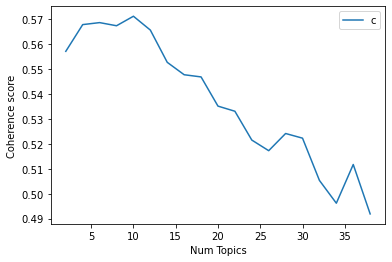

In [36]:
# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [37]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5571
Num Topics = 4  has Coherence Value of 0.5679
Num Topics = 6  has Coherence Value of 0.5687
Num Topics = 8  has Coherence Value of 0.5674
Num Topics = 10  has Coherence Value of 0.5712
Num Topics = 12  has Coherence Value of 0.5657
Num Topics = 14  has Coherence Value of 0.5527
Num Topics = 16  has Coherence Value of 0.5478
Num Topics = 18  has Coherence Value of 0.5469
Num Topics = 20  has Coherence Value of 0.5352
Num Topics = 22  has Coherence Value of 0.5331
Num Topics = 24  has Coherence Value of 0.5215
Num Topics = 26  has Coherence Value of 0.5173
Num Topics = 28  has Coherence Value of 0.5242
Num Topics = 30  has Coherence Value of 0.5223
Num Topics = 32  has Coherence Value of 0.5053
Num Topics = 34  has Coherence Value of 0.4962
Num Topics = 36  has Coherence Value of 0.5117
Num Topics = 38  has Coherence Value of 0.4919


In [44]:
#display topics in data frame
#https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396
tm_results = ldamallet[corpus]

In [45]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [46]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=20)] for n in range(0, ldamallet.num_topics)]

In [47]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df

Topic 1    Topic 2 Topic 3    Topic 4      Topic 5          Topic 6  \
Term1   eat        ac         good    diet       diabetes     doctor            
Term2   food       year       feel    carbs      people       test              
Term3   bread      month      thing   low        type         testing           
Term4   sugar      week       great   keto       post         check             
Term5   snack      weight     lot     carb       disease      meter             
Term6   meal       diagnosed  work    fat        health       result            
Term7   cheese     started    time    eat        question     time              
Term8   fruit      ago        sound   sugar      research     point             
Term9   small      lb         luck    eating     medical      read              
Term10  eating     diagnosis  bit     food       information  insurance         
Term11  potato     lost       ill     lot        advice       told              
Term12  carbs      lose       making  protein    understand   gt                
Term13  sweet      symptom    yeah    high       study        strip             
Term14  meat       change     pretty  calorie    experience   tested            
Term15  rice       couple     hope    avoid      ampxb        pretty            
Term16  recipe     normal     libre   diabetic   patient      idea              
Term17  egg        past       stuff   intake     answer       number            
Term18  breakfast  loss       sensor  good       link         endocrinologist   
Term19  veggie     today      job     rketo      condition    talk              
Term20  lunch      pound      place   recommend  support      endo              

        Topic 7     Topic 8      Topic 9    Topic 10  
Term1   blood    day         diabetic     insulin     
Term2   sugar    metformin   control      type        
Term3   hour     exercise    diabetes     glucose     
Term4   level    med         life         body        
Term5   bg       work        long         diabetes    
Term6   fasting  taking      bad          problem     
Term7   meal     effect      thing        liver       
Term8   day      start       dr           blood       
Term9   high     mg          healthy      resistance  
Term10  time     time        good         level       
Term11  reading  drink       hard         high        
Term12  morning  medication  term         increase    
Term13  number   minute      foot         hypo        
Term14  normal   daily       number       issue       
Term15  range    water       cholesterol  unit        
Term16  lower    pill        book         case        
Term17  eating   dose        hospital     longer      
Term18  night    walk        worse        pancreas    
Term19  glucose  working     eye          energy      
Term20  drop     stop        live         symptom

In [48]:
# set column width
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )
topics_df

<ipython-input-48-22448409583d>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Terms per Topic
Topic1   eat, food, bread, sugar, snack, meal, cheese, fruit, small, eating, potato, carbs, sweet, meat, rice, recipe, egg, breakfast, veggie, lunch                                     
Topic2   ac, year, month, week, weight, diagnosed, started, ago, lb, diagnosis, lost, lose, symptom, change, couple, normal, past, loss, today, pound                                    
Topic3   good, feel, thing, great, lot, work, time, sound, luck, bit, ill, making, yeah, pretty, hope, libre, stuff, sensor, job, place                                                  
Topic4   diet, carbs, low, keto, carb, fat, eat, sugar, eating, food, lot, protein, high, calorie, avoid, diabetic, intake, good, rketo, recommend                                       
Topic5   diabetes, people, type, post, disease, health, question, research, medical, information, advice, understand, study, experience, ampxb, patient, answer, link, condition, support
Topic6   doctor, test, testing, check, meter, result, time, point, read, insurance, told, gt, strip, tested, pretty, idea, number, endocrinologist, talk, endo                           
Topic7   blood, sugar, hour, level, bg, fasting, meal, day, high, time, reading, morning, number, normal, range, lower, eating, night, glucose, drop                                     
Topic8   day, metformin, exercise, med, work, taking, effect, start, mg, time, drink, medication, minute, daily, water, pill, dose, walk, working, stop                                  
Topic9   diabetic, control, diabetes, life, long, bad, thing, dr, healthy, good, hard, term, foot, number, cholesterol, book, hospital, worse, eye, live                                 
Topic10  insulin, type, glucose, body, diabetes, problem, liver, blood, resistance, level, high, increase, hypo, issue, unit, case, longer, pancreas, energy, symptom

In [94]:
#export list of topics
topics_df.to_csv('diabetes2018_topics.csv', index = False)

In [49]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
#https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396

from gensim.models.ldamodel import LdaModel

def convertldaMalletToldaGen(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) 
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [50]:
ldagensim = convertldaMalletToldaGen(ldamallet)

In [51]:
import pyLDAvis.gensim as gensimvis
vis_data = gensimvis.prepare(ldagensim, corpus, id2word, sort_topics=False)
pyLDAvis.display(vis_data)

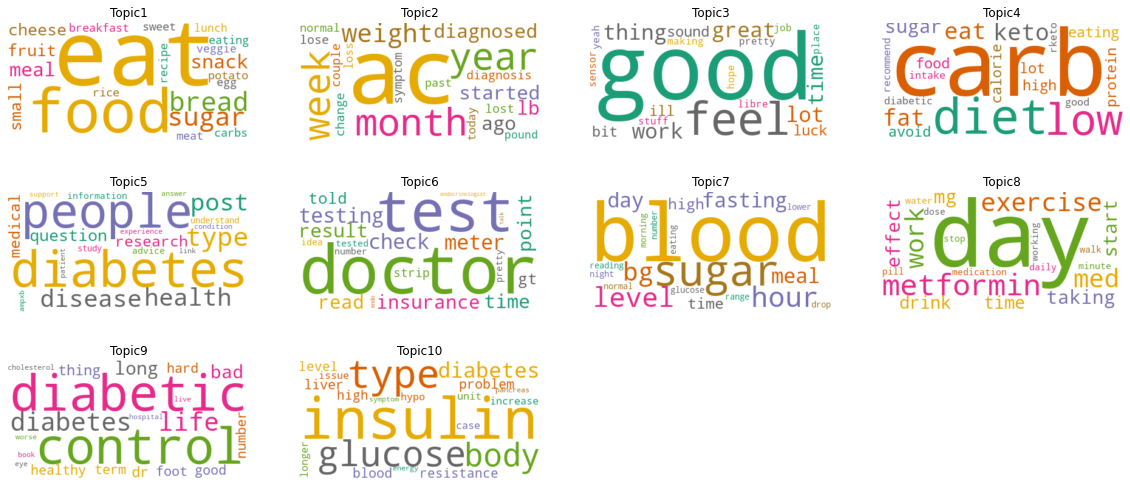

In [52]:
#word cloud
# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(10):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

In [53]:
#convert date to datetime variable
diabetes2018["Publish Date"] = pd.to_datetime(diabetes2018['Publish Date'], errors='coerce')
diabetes2018

<ipython-input-53-31a48e358afe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018["Publish Date"] = pd.to_datetime(diabetes2018['Publish Date'], errors='coerce')


Post ID        Publish Date            Author  \
0      7ng7rl  2018-01-01 09:16:00  penguinsarefun     
1      7nlbda  2018-01-02 00:58:00  MrCanoe            
2      7nnmor  2018-01-02 08:55:00  Heylola2           
3      dwcllds 2018-03-26 22:23:00  [deleted]          
4      dzokqh6 2018-05-27 16:56:00  Heylola2           
...        ...                 ...       ...           
12514  ecv4dtv 2018-12-30 02:02:00  AccidentalDragon   
12515  ecve2zu 2018-12-30 05:56:00  gnilmit            
12516  ecwd91h 2018-12-30 13:32:00  jacobi123          
12517  ecwiejq 2018-12-30 14:31:00  FlowMang           
12518  ecxmy0m 2018-12-31 00:23:00  alan_s             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Text  \
0      Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  I've been crazy fatigued and thirsty x many months. My fasting glucose that morning was 151. I was started on metformin and trulicity and have been eating very well since then. I already feel better, generally less hungry and tired. My fasting glucose has been 100-110 every morning since. I'm looking forward to this journey!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1      Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now as a way to lose weight and hopefully lower the medication i'm on. I currently take 3 metformin, 1 Gliclazide and 1 Jardiance a day(5 pills total) How risky is doing the Keto diet if i'm on that much medication? The jardiance(also called empagliflozin) is new as My A1C had risen from mid 5's to 7.0 in 2017. One of the reasons was I got a new doctor in late 2016 and my old doctor had me on 3 metformin's and 2 Gliclazide's a day and on that I was getting 5.4-5.7 A1C but my new doctor told me A1C's in the 5's was bad for a diabetic and that Gliclazide isn't to gr

In [106]:
#revalue row index
diabetes2018.index = range(11892)
diabetes2018

Post ID        Publish Date            Author  \
0      7ng7rl  2018-01-01 09:16:00  penguinsarefun     
1      7nlbda  2018-01-02 00:58:00  MrCanoe            
2      7nnmor  2018-01-02 08:55:00  Heylola2           
3      dwcllds 2018-03-26 22:23:00  [deleted]          
4      dzokqh6 2018-05-27 16:56:00  Heylola2           
...        ...                 ...       ...           
11887  ecv4dtv 2018-12-30 02:02:00  AccidentalDragon   
11888  ecve2zu 2018-12-30 05:56:00  gnilmit            
11889  ecwd91h 2018-12-30 13:32:00  jacobi123          
11890  ecwiejq 2018-12-30 14:31:00  FlowMang           
11891  ecxmy0m 2018-12-31 00:23:00  alan_s             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Text  \
0      Hey all! Happy New year's! Just wanted to say hi.  I was diagnosed with type 2 DM on Thursday.  I've been crazy fatigued and thirsty x many months. My fasting glucose that morning was 151. I was started on metformin and trulicity and have been eating very well since then. I already feel better, generally less hungry and tired. My fasting glucose has been 100-110 every morning since. I'm looking forward to this journey!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1      Hello I'm a 6'1, 260lbs male with Type 2 diabetes. I've been looking into Keto for a while now as a way to lose weight and hopefully lower the medication i'm on. I currently take 3 metformin, 1 Gliclazide and 1 Jardiance a day(5 pills total) How risky is doing the Keto diet if i'm on that much medication? The jardiance(also called empagliflozin) is new as My A1C had risen from mid 5's to 7.0 in 2017. One of the reasons was I got a new doctor in late 2016 and my old doctor had me on 3 metformin's and 2 Gliclazide's a day and on that I was getting 5.4-5.7 A1C but my new doctor told me A1C's in the 5's was bad for a diabetic and that Gliclazide isn't to gr

In [107]:
#find weight of each topic per row
#https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-3-ab03e01b7cd7
topic_weights2018 = pd.DataFrame.from_records([{v: k for v, k in row} for row in tm_results])
topic_weights2018.columns = ['Topic ' + str(i) for i in range(1,11)]
topic_weights2018

Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6   Topic 7  \
0      0.072150  0.204906  0.090909  0.080808  0.082251  0.064935  0.165945   
1      0.057676  0.127226  0.074640  0.134012  0.049194  0.098388  0.074640   
2      0.085185  0.201235  0.125926  0.075309  0.080247  0.087654  0.077778   
3      0.103448  0.103448  0.105364  0.086207  0.097701  0.111111  0.105364   
4      0.111111  0.086806  0.116319  0.097222  0.078125  0.078125  0.126736   
...         ...       ...       ...       ...       ...       ...       ...   
11887  0.100182  0.131148  0.085610  0.094718  0.081967  0.081967  0.085610   
11888  0.093398  0.136876  0.072464  0.194847  0.078905  0.072464  0.074074   
11889  0.090909  0.090909  0.107071  0.125253  0.090909  0.090909  0.090909   
11890  0.066667  0.114074  0.071111  0.084444  0.087407  0.115556  0.191111   
11891  0.077441  0.102694  0.107744  0.144781  0.079125  0.119529  0.099327   

        Topic 8   Topic 9  Topic 10  
0      0.080808  0.064935  0.092352  
1      0.215437  0.088210  0.080577  
2      0.108642  0.098765  0.059259  
3      0.114943  0.086207  0.086207  
4      0.121528  0.093750  0.090278  
...         ...       ...       ...  
11887  0.114754  0.142077  0.081967  
11888  0.103060  0.101449  0.072464  
11889  0.111111  0.111111  0.090909  
11890  0.128889  0.068148  0.072593  
11891  0.095960  0.075758  0.097643  

[11892 rows x 10 columns]

In [108]:
#find topics per month / year
#topic_weights2018['month'] = diabetes2018["Publish Date"].dt.month
#topic_weights2018['year'] = diabetes2018["Publish Date"].dt.year
topic_weights2018['month_year'] = pd.to_datetime(diabetes2018['Publish Date']).dt.to_period('M')
topic_weights2018

Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6   Topic 7  \
0      0.072150  0.204906  0.090909  0.080808  0.082251  0.064935  0.165945   
1      0.057676  0.127226  0.074640  0.134012  0.049194  0.098388  0.074640   
2      0.085185  0.201235  0.125926  0.075309  0.080247  0.087654  0.077778   
3      0.103448  0.103448  0.105364  0.086207  0.097701  0.111111  0.105364   
4      0.111111  0.086806  0.116319  0.097222  0.078125  0.078125  0.126736   
...         ...       ...       ...       ...       ...       ...       ...   
11887  0.100182  0.131148  0.085610  0.094718  0.081967  0.081967  0.085610   
11888  0.093398  0.136876  0.072464  0.194847  0.078905  0.072464  0.074074   
11889  0.090909  0.090909  0.107071  0.125253  0.090909  0.090909  0.090909   
11890  0.066667  0.114074  0.071111  0.084444  0.087407  0.115556  0.191111   
11891  0.077441  0.102694  0.107744  0.144781  0.079125  0.119529  0.099327   

        Topic 8   Topic 9  Topic 10 month_year  
0      0.080808  0.064935  0.092352  2018-01    
1      0.215437  0.088210  0.080577  2018-01    
2      0.108642  0.098765  0.059259  2018-01    
3      0.114943  0.086207  0.086207  2018-03    
4      0.121528  0.093750  0.090278  2018-05    
...         ...       ...       ...      ...    
11887  0.114754  0.142077  0.081967  2018-12    
11888  0.103060  0.101449  0.072464  2018-12    
11889  0.111111  0.111111  0.090909  2018-12    
11890  0.128889  0.068148  0.072593  2018-12    
11891  0.095960  0.075758  0.097643  2018-12    

[11892 rows x 11 columns]

In [109]:
#find dominant topic of the record
topic_weights2018['Dominant'] = topic_weights2018.drop('month_year', axis=1).idxmax(axis=1)
topic_weights2018

Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6   Topic 7  \
0      0.072150  0.204906  0.090909  0.080808  0.082251  0.064935  0.165945   
1      0.057676  0.127226  0.074640  0.134012  0.049194  0.098388  0.074640   
2      0.085185  0.201235  0.125926  0.075309  0.080247  0.087654  0.077778   
3      0.103448  0.103448  0.105364  0.086207  0.097701  0.111111  0.105364   
4      0.111111  0.086806  0.116319  0.097222  0.078125  0.078125  0.126736   
...         ...       ...       ...       ...       ...       ...       ...   
11887  0.100182  0.131148  0.085610  0.094718  0.081967  0.081967  0.085610   
11888  0.093398  0.136876  0.072464  0.194847  0.078905  0.072464  0.074074   
11889  0.090909  0.090909  0.107071  0.125253  0.090909  0.090909  0.090909   
11890  0.066667  0.114074  0.071111  0.084444  0.087407  0.115556  0.191111   
11891  0.077441  0.102694  0.107744  0.144781  0.079125  0.119529  0.099327   

        Topic 8   Topic 9  Topic 10 month_year Dominant  
0      0.080808  0.064935  0.092352  2018-01    Topic 2  
1      0.215437  0.088210  0.080577  2018-01    Topic 8  
2      0.108642  0.098765  0.059259  2018-01    Topic 2  
3      0.114943  0.086207  0.086207  2018-03    Topic 8  
4      0.121528  0.093750  0.090278  2018-05    Topic 7  
...         ...       ...       ...      ...        ...  
11887  0.114754  0.142077  0.081967  2018-12    Topic 9  
11888  0.103060  0.101449  0.072464  2018-12    Topic 4  
11889  0.111111  0.111111  0.090909  2018-12    Topic 4  
11890  0.128889  0.068148  0.072593  2018-12    Topic 7  
11891  0.095960  0.075758  0.097643  2018-12    Topic 4  

[11892 rows x 12 columns]

In [110]:
#extract topic weighting
topic_weights2018.to_csv('topic_weight2018.csv', index = False)

In [111]:
#percentage of dominant topics per a month
topic_dominant2018 = topic_weights2018.groupby('month_year')['Dominant'].value_counts(normalize=True).unstack()
topic_dominant2018

Dominant     Topic 1  Topic 10   Topic 2   Topic 3   Topic 4   Topic 5  \
month_year                                                               
2018-01     0.134715  0.062176  0.145078  0.108808  0.103627  0.113990   
2018-02     0.125899  0.093525  0.080336  0.119904  0.091127  0.105516   
2018-03     0.086078  0.086826  0.111527  0.130988  0.084581  0.109281   
2018-04     0.134188  0.077778  0.135897  0.124786  0.076068  0.106838   
2018-05     0.206653  0.074597  0.082661  0.081653  0.117944  0.093750   
2018-06     0.183871  0.076774  0.087097  0.107742  0.097419  0.111613   
2018-07     0.125197  0.087402  0.118110  0.133858  0.092913  0.106299   
2018-08     0.109622  0.085262  0.112058  0.160780  0.090134  0.081608   
2018-09     0.153527  0.053942  0.116183  0.102351  0.084371  0.110650   
2018-10     0.131414  0.061327  0.117647  0.126408  0.107635  0.126408   
2018-11     0.157092  0.070018  0.117594  0.115799  0.092460  0.108618   
2018-12     0.131944  0.048611  0.083333  0.163690  0.084325  0.111111   
2019-01     0.212121  0.045455  0.090909  0.166667  0.121212  0.106061   
2019-02     0.090909  0.181818  0.181818  0.090909 NaN        0.090909   
2019-03    NaN       NaN        0.250000  0.250000 NaN       NaN         
2019-04    NaN       NaN       NaN        1.000000 NaN       NaN         

Dominant     Topic 6   Topic 7   Topic 8   Topic 9  
month_year                                          
2018-01     0.041451  0.098446  0.098446  0.093264  
2018-02     0.109113  0.118705  0.081535  0.074341  
2018-03     0.144461  0.083084  0.089820  0.073353  
2018-04     0.088034  0.100855  0.075214  0.080342  
2018-05     0.066532  0.123992  0.083669  0.068548  
2018-06     0.076774  0.103226  0.090968  0.064516  
2018-07     0.097638  0.090551  0.055118  0.092913  
2018-08     0.105968  0.097442  0.077954  0.079172  
2018-09     0.085754  0.088520  0.102351  0.102351  
2018-10     0.061327  0.073842  0.112641  0.081352  
2018-11     0.107720  0.093357  0.070018  0.067325  
2018-12     0.116071  0.090278  0.076389  0.094246  
2019-01     0.106061  0.045455  0.030303  0.075758  
2019-02     0.181818 NaN        0.090909  0.090909  
2019-03     0.250000 NaN        0.250000 NaN        
2019-04    NaN       NaN       NaN       NaN

In [112]:
#dominant topic by year
topic_dominant2018['Dominant'] = topic_dominant2018.idxmax(axis=1)
topic_dominant2018

Dominant     Topic 1  Topic 10   Topic 2   Topic 3   Topic 4   Topic 5  \
month_year                                                               
2018-01     0.134715  0.062176  0.145078  0.108808  0.103627  0.113990   
2018-02     0.125899  0.093525  0.080336  0.119904  0.091127  0.105516   
2018-03     0.086078  0.086826  0.111527  0.130988  0.084581  0.109281   
2018-04     0.134188  0.077778  0.135897  0.124786  0.076068  0.106838   
2018-05     0.206653  0.074597  0.082661  0.081653  0.117944  0.093750   
2018-06     0.183871  0.076774  0.087097  0.107742  0.097419  0.111613   
2018-07     0.125197  0.087402  0.118110  0.133858  0.092913  0.106299   
2018-08     0.109622  0.085262  0.112058  0.160780  0.090134  0.081608   
2018-09     0.153527  0.053942  0.116183  0.102351  0.084371  0.110650   
2018-10     0.131414  0.061327  0.117647  0.126408  0.107635  0.126408   
2018-11     0.157092  0.070018  0.117594  0.115799  0.092460  0.108618   
2018-12     0.131944  0.048611  0.083333  0.163690  0.084325  0.111111   
2019-01     0.212121  0.045455  0.090909  0.166667  0.121212  0.106061   
2019-02     0.090909  0.181818  0.181818  0.090909 NaN        0.090909   
2019-03    NaN       NaN        0.250000  0.250000 NaN       NaN         
2019-04    NaN       NaN       NaN        1.000000 NaN       NaN         

Dominant     Topic 6   Topic 7   Topic 8   Topic 9  Dominant  
month_year                                                    
2018-01     0.041451  0.098446  0.098446  0.093264  Topic 2   
2018-02     0.109113  0.118705  0.081535  0.074341  Topic 1   
2018-03     0.144461  0.083084  0.089820  0.073353  Topic 6   
2018-04     0.088034  0.100855  0.075214  0.080342  Topic 2   
2018-05     0.066532  0.123992  0.083669  0.068548  Topic 1   
2018-06     0.076774  0.103226  0.090968  0.064516  Topic 1   
2018-07     0.097638  0.090551  0.055118  0.092913  Topic 3   
2018-08     0.105968  0.097442  0.077954  0.079172  Topic 3   
2018-09     0.085754  0.088520  0.102351  0.102351  Topic 1   
2018-10     0.061327  0.073842  0.112641  0.081352  Topic 1   
2018-11     0.107720  0.093357  0.070018  0.067325  Topic 1   
2018-12     0.116071  0.090278  0.076389  0.094246  Topic 3   
2019-01     0.106061  0.045455  0.030303  0.075758  Topic 1   
2019-02     0.181818 NaN        0.090909  0.090909  Topic 10  
2019-03     0.250000 NaN        0.250000 NaN        Topic 2   
2019-04    NaN       NaN       NaN       NaN        Topic 3

In [113]:
topic_dominant2018.to_csv('topic_dominant2018.csv', index = False)

In [114]:
#merge dataframes together
diabetes2018['Dominant'] = topic_weights2018['Dominant']
diabetes2018['month_year'] = topic_weights2018['month_year']
diabetes2018.tail()

<ipython-input-114-09cbf14679ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['Dominant'] = topic_weights2018['Dominant']
<ipython-input-114-09cbf14679ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes2018['month_year'] = topic_weights2018['month_year']


Post ID        Publish Date            Author  \
11887  ecv4dtv 2018-12-30 02:02:00  AccidentalDragon   
11888  ecve2zu 2018-12-30 05:56:00  gnilmit            
11889  ecwd91h 2018-12-30 13:32:00  jacobi123          
11890  ecwiejq 2018-12-30 14:31:00  FlowMang           
11891  ecxmy0m 2018-12-31 00:23:00  alan_s             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Text  \
11887  In 6 mos, my A1c went from 10.5-ish to 6.7, my cholesterol down 30 pts, triglycerides down 90 pts, and bad cholesterol down 10. :) And this, eating bacon!                                                                                                                                                                                                                                                                                                          
11888  What everyone else said. I don't even do full keto - I keep my carbs under 50, instead of under 20 - and my A1C went from 11.8 to 6.0 in 6 months.\n\nI don't have the willpower to maintain a full keto lifestyle, but even just half assing it is such an improvement to the way that I WAS eating, that it works for me. So if you don't think  you can jump in full keto, just try reducing your carbs to half of what you currently eat, and go from there.    
11889  A perfect example of not letting the perfect become the enemy of the good.                                                                                                                                                                                                                                                                                                                                                                                          
11890  Same. Mine was 9.3. Was down to 5.5 after 90 days and been 5.2 and 5.3 ever since(about a year since my doctor discontinued metformin). My blood sugar is so steady I can predict my sugar within 5 points based on the time of day.  Also my a1c exactly matches my 90 day average for sugar. Exercise is super helpful too.  If you can make those dietary changes you will be much better off for it.                                                            
11891  &gt;What i'd like to do is lower my Tuojeo dose and want to figure out how to do that. Can someone recommend a good diet to follow to keep sugars in check and to help lower weight?\n\nBegin here (click on it): [Getting Started](                                                                                                                                                                                                                                

                                                                                                                                                                                                                                                      text_gens_nonstop  \
11887  In 6 mos, A1c went 10.5-ish 6.7, cholesterol 30 pts, triglycerides 90 pts, bad cholesterol 10. :) And this, eating bacon!                                                                                                                                          
11888  What said. I don't keto - I carbs 50, instead 20 - A1C went 11.8 6.0 6 months. I don't willpower maintain keto lifestyle, half assing improvement way I WAS eating, works me. So don't think jump keto, try reducing carbs half currently eat, there.              
11889  A perfect example letting perfect enemy good.                                                        

In [115]:
#export dataframe
diabetes2018.to_csv('diabetes2018_lda.csv', index = False)